### 정보 이론
2026-02-19 박연수
1. Entropy
2. Cross Entropy
3. KL Divergence
4. Mutual Information

### 1. Entropy

정보이론에서 시스템은 송신자, 채널, 수신자를 이용하여 모형화한다. 송신자는 채널을 통해 전달되는 메시지를 만들어낸다. 채널은 특정한 방식을 통해 메시지를 변경한다. 수신자는 어떤 메시지가 보내진 것인지 추론하고자 한다. 이 맥락에서 정보 엔트로피(또는 섀넌 엔트로피)는 <strong>각 메시지에 포함된 정보의 기댓값(평균)이다.</strong> '메시지'는 어떤 흐름의 정보에 대해서도 모형화할 수 있다.
- 기댓값(expected value, E)은 각 사건이 벌어졌을 때의 이득과 그 사건이 벌어질 확률을 곱한 것을 전체 사건에 대해 합한 값이다.   

기술적인 관점에서 보면 정보는 발생 가능한 사건이나 메시지의 확률분포의 음의 로그로 정의할 수 있다. 각 사건의 정보량은 그 기댓값, 또는 평균이 섀넌 엔트로피인 확률변수를 형성한다.

확률이 낮을수록, 어떤 정보일지는 불확실하게 되고, 우리는 이때 '정보가 많다', '엔트로피가 높다'고 표현한다.

$H(X)=-\sum_{i} p_i log_2 p_i$

tensor([0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000, 0.9000,
        1.0000])
tensor([3.3219, 2.3219, 1.7370, 1.3219, 1.0000, 0.7370, 0.5146, 0.3219, 0.1520,
        -0.0000])
tensor([0.3322, 0.4644, 0.5211, 0.5288, 0.5000, 0.4422, 0.3602, 0.2575, 0.1368,
        -0.0000])


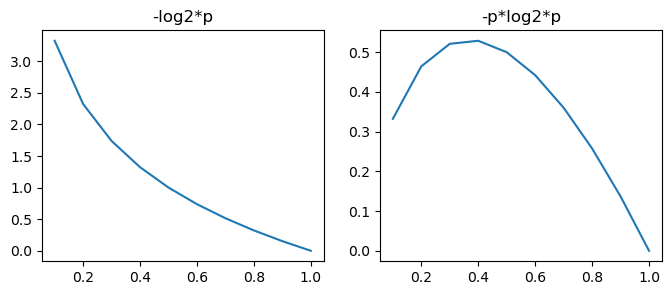

In [1]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
y = -torch.log2(x)
print(x)
print(y)
print(y*x)
plt.figure(figsize=(8,3))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title("-log2*p")
plt.subplot(1, 2, 2)
plt.title("-p*log2*p")
plt.plot(x, y*x)
plt.show()

In [2]:
COIN = 2
DICE = 6

coin_probabilty = torch.tensor([1/COIN for _ in range(COIN)])
dice_probabilty = torch.tensor([1/DICE for _ in range(DICE)])
random_probabilty = torch.tensor([0.1, 0.9])

def entropy(p):
    assert p.sum() == 1, "확률 분포가 아닙니다."
    eps = 1e-8
    return -torch.sum(p*torch.log2(p + eps))

coin_entropy = entropy(coin_probabilty)
dice_entropy = entropy(dice_probabilty)
random_entropy = entropy(random_probabilty)
print(coin_probabilty, dice_probabilty, random_probabilty)
print(coin_entropy, dice_entropy, random_entropy)

tensor([0.5000, 0.5000]) tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]) tensor([0.1000, 0.9000])
tensor(1.) tensor(2.5850) tensor(0.4690)


위와 같은 균등분포에서 $p_i = 1/n$이고 따라서   

$H=-\sum^n_{i=1}p_ilog_2p_i=log_2n$이다.

In [3]:
print(coin_entropy == torch.log2(torch.tensor(COIN)))
print(dice_entropy == torch.log2(torch.tensor(DICE)))

tensor(True)
tensor(True)


로그 함수는 독립적인 불확실성에 가산성을 제공하는데 사용된다. 예를 들어, 크기 m의 이산 표본 공간과 크기 n의 이산 표본 공간에서, 서로 독립이며 균등분포를 따르는 두 확률변수를 동시에 측정할 경우, 그 총 엔트로피는 

$log_2(mn)=log_2(m)+log_2(n)$과 같다. 

즉, 서로 독립인 두 확률변수의 엔트로피는 각 확률변수의 엔트로피의 합과 같다.

In [4]:
print((coin_entropy + dice_entropy) == torch.log2(torch.tensor(COIN*DICE)))

tensor(True)


### 2. Cross Entropy

정보이론에서 교차 엔트로피란, 두 확률 분포 p 와 q를 구분하기 위해 필요한 평균 비트 수를 의미한다.

동일한 이벤트 공간의 두 분포 p와 q 사이의 교차 엔트로피는 다음과 같이 정의된다.

$$
E_P[X] = \sum_ip_ix_i \\
H(P, Q) = E_P[-log_2Q] = -\sum_ip_ilog_2q_i \\
H(P,Q) \neq H(Q,P)
$$

In [5]:
def cross_entropy(p, q):
    assert p.sum() == 1 and q.sum() == 1, "확률 분포가 아닙니다."
    eps = 1e-8
    return -torch.sum(p*torch.log2(q + eps))

# binary class classification
binary_label = torch.tensor([1., 0.])
# multi class classification
multi_label = torch.zeros(5)
multi_label[2] = 1

binary_predictions = torch.tensor([[0.1, 0.9],
                                   [0.5, 0.5],
                                   [0.9, 0.1],
                                   [1., 0.]
                                   ])

multi_predictions = torch.tensor([[0.05, 0.05, 0.05, 0.05, 0.8],
                                   [0.2, 0.2, 0.2, 0.2, 0.2,],
                                   [0.05, 0.05, 0.8, 0.05, 0.05],
                                   [0., 0., 1., 0., 0.,]
                                   ])

print("Binary Class Classification")
for binary_prediction in binary_predictions:
    print("prediction: ", binary_prediction)
    print("CE: ",cross_entropy(binary_label, binary_prediction))

print("Multi Class Classification")

for multi_prediction in multi_predictions:
    print("prediction: ", multi_prediction)
    print("CE: ", cross_entropy(multi_label, multi_prediction))    

Binary Class Classification
prediction:  tensor([0.1000, 0.9000])
CE:  tensor(3.3219)
prediction:  tensor([0.5000, 0.5000])
CE:  tensor(1.)
prediction:  tensor([0.9000, 0.1000])
CE:  tensor(0.1520)
prediction:  tensor([1., 0.])
CE:  tensor(-0.)
Multi Class Classification
prediction:  tensor([0.0500, 0.0500, 0.0500, 0.0500, 0.8000])
CE:  tensor(4.3219)
prediction:  tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
CE:  tensor(2.3219)
prediction:  tensor([0.0500, 0.0500, 0.8000, 0.0500, 0.0500])
CE:  tensor(0.3219)
prediction:  tensor([0., 0., 1., 0., 0.])
CE:  tensor(-0.)


### 3. KL Divergence
쿨백-라이블러 발산(Kullback–Leibler divergence, KLD)은 두 확률분포의 차이를 계산하는 데에 사용하는 함수로, 어떤 이상적인 분포에 대해, 그 분포를 근사하는 다른 분포를 사용해 샘플링을 한다면 발생할 수 있는 정보 엔트로피 차이를 계산한다. 상대 엔트로피(relative entropy), 정보 획득량(information gain), 인포메이션 다이버전스(information divergence)라고도 한다. 정보이론에서는 상대 엔트로피, 기계학습의 결정 트리에서는 정보 획득량을 주로 사용한다.

쿨백-라이블러 발산은 비대칭으로, 두 값의 위치를 바꾸면 함수값도 달라진다. 따라서 이 함수는 거리 함수는 아니다.

$$
D_{KL}(P||Q) = \sum P(i)log\frac{P(i)}{Q(i)}
$$

In [6]:
def KLD(p, q):
    assert p.sum() == 1 and q.sum() == 1, "확률 분포가 아닙니다."
    eps = 1e-8
    return torch.sum(p*torch.log2((p + eps) / (q + eps)))

p = torch.tensor([0.1, 0.2, 0.3, 0.4])
q = torch.tensor([0.25, 0.25, 0.25, 0.25])
rst1 = KLD(p, q)
rst2 = KLD(q, p)
print(rst1)
print(rst2)

tensor(0.1536)
tensor(0.1757)


쿨백-라이블러 발산은 어떠한 확률분포 P가 있을 때, 샘플링 과정에서 그 분포를 근사적으로 표현하는 확률분포 Q 를 P 대신 사용할 경우 엔트로피 변화를 의미한다. 따라서, 원래의 분포가 가지는 엔트로피 H(P)와 P 대신 Q를 사용할 때의 교차 엔트로피(cross entropy) H(P,Q)의 차이를 구하면,
$$
D_{KL}(P||Q) = H(P, Q) - H(P) \\
= (-\sum_iP(i)log_2Q(i)) - (-\sum_iP(i)log_2P(i)) \\
= \sum_iP(i)log_2(P(i))-log_2(Q(i)) \\
= D_{KL}(P||Q) = \sum P(i)log\frac{P(i)}{Q(i)}
$$
로, 원래 정의했던 식과 같은 결과가 나온다.

In [7]:
def KLD2(p, q):
    return cross_entropy(p, q) - entropy(p)

rst3 = KLD2(p, q)
rst4 = KLD2(p, q)
print(rst1 == rst3)
print(rst2 == rst4)

tensor(False)
tensor(False)



torch.allclose() 함수는 두 텐서가 지정된 허용 오차 내에서 거의 동일한지를 확인. 이는 부동 소수점 연산의 미세한 차이로 인한 불일치를 허용할 수 있음 (권장).

In [8]:
print(torch.allclose(rst1, KLD2(p, q)))
print(torch.allclose(rst2, KLD2(q, p)))

True
True


Distance와 Divergence 차이는 무엇일까?

거리 척도 특성이란, "거리"라고 말할 수 있게 되기 위한 기준을 의미한다. 이 특성에는 다음 4가지가 존재한다.
비음성: d(x, y) >= 0
동일성: d(x,y)=0 이면 x=y이고, 그 역도 성립한다.
대칭성: d(x, y) = d(y, x)
삼각부등식 d(x, z) <= d(x, y) + d(y, z)

문제: 실제로 KL 발산은 거리의 척도(metric) 특성 네가지 중 두가지만을 만족한다. 만족하지 않는 두가지는 무엇일까?

Reference
1. entropy: 
- https://ko.wikipedia.org/wiki/%EC%A0%95%EB%B3%B4_%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC
2. cross entropy: 
- https://en.wikipedia.org/wiki/Cross-entropy
3. KL Diverence: 
- https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence
- https://ds31x.tistory.com/265
- https://go-gradually.tistory.com/m/entry/%EC%A0%95%EB%B3%B4-%EC%9D%B4%EB%A1%A0-KL-Divergence-KL-%EB%B0%9C%EC%82%B0-%ED%81%AC%EB%A1%9C%EC%8A%A4-%EC%97%94%ED%8A%B8%EB%A1%9C%ED%94%BC%EB%A5%BC-%EC%93%B0%EB%8A%94-%EC%9D%B4%EC%9C%A0